In [1]:
import torch
import lib.utils.bookkeeping as bookkeeping
from torch.utils.data import DataLoader
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import lib.models.models as models
import lib.models.model_utils as model_utils
from lib.datasets import mnist, maze, protein, synthetic
import lib.datasets.dataset_utils as dataset_utils
import lib.losses.losses as losses
import lib.losses.losses_utils as losses_utils
import lib.training.training as training
import lib.training.training_utils as training_utils
import lib.optimizers.optimizers as optimizers
import lib.optimizers.optimizers_utils as optimizers_utils
import lib.sampling.sampling as sampling
import lib.sampling.sampling_utils as sampling_utils
import os
from lib.datasets.maze import maze_acc
from ruamel.yaml.scalarfloat import ScalarFloat

In [2]:
# creating path


path = 'SavedModels/MNISTHollow/' # 'SavedModels/MAZE/' 'SavedModels/MNIST/'
date = '2024-01-03' # 2
config_name = 'config_001_hollow.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_539999_hollow.pt'

path = 'SavedModels/MNIST/' # 'SavedModels/MAZE/' 'SavedModels/MNIST/'
date = '2023-12-25' # 2
config_name = 'config_001_unet14Mlogits.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_599999_unet14Mlogits.pt'


path = 'SavedModels/MAZEunet/' # 'SavedModels/MAZE/' 'SavedModels/MNIST/'
date = '2023-12-30' # 2
config_name = 'config_001_lastunet.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_399999_lastunet.pt'


path = "SavedModels/SyntheticMasked/"
date = '2023-12-17' # 2
config_name = 'config_001_masked.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_199999_masked.pt'

path = 'SavedModels/MNISTHollow/' # 'SavedModels/MAZE/' 'SavedModels/MNIST/'
date = '2024-01-03' # 2
config_name = 'config_001_hollow.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_539999_hollow.pt'

path = 'SavedModels/MNIST/' # 'SavedModels/MAZE/' 'SavedModels/MNIST/'
date = '2023-12-25' # 2
config_name = 'config_001_unet14Mlogits.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_599999_unet14Mlogits.pt'

path = 'SavedModels/MNISTHollow/' # 'SavedModels/MAZE/' 'SavedModels/MNIST/'
date = '2024-01-03' # 2
config_name = 'config_001_hollow.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_539999_hollow.pt'

path = 'SavedModels/MAZE/' # 'SavedModels/MAZE/' 'SavedModels/MNIST/'
date = '2023-12-22' # 2
config_name = 'config_001_hollow8M.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_299999_hollow8M.pt' 

path = 'SavedModels/MAZE/' # 'SavedModels/MAZE/' 'SavedModels/MNIST/'
date = '2023-12-28' # 2
config_name = 'config_001_hollowelbo.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_259999_hollowelbo.pt'

path = 'SavedModels/MAZE/' # 'SavedModels/MAZE/' 'SavedModels/MNIST/'
date = '2024-01-05' # 2
config_name = 'config_001_hollowdirect.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_299999_hollowdirect.pt' 


path = "SavedModels/SyntheticRMDirect/"
date = '2023-12-20' # 2023-10-30 'Hollow-2023-10-29'
config_name = 'config_001_hollowCEDirect500K.yaml' # 'config_001_maze.yaml' 'config_001_rate001.yaml'
model_name = 'model_199999_hollowCEDirect500K.pt' 


path = "SavedModels/SyntheticMasked/"
date = '2024-01-14' # 2
config_name = 'config_001_maskedelbo.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_199999_maskedelbo.pt'

path = "SavedModels/SyntheticMasked/"
date = '2023-12-17' # 2
config_name = 'config_001_maskeddirect.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_199999_maskeddirect.pt'

path = "SavedModels/MNISTHollow/"
date = '2024-01-13' # 2
config_name = 'config_001_hollow_elbo.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_109999_hollow_elbo.pt'


path = "SavedModels/SyntheticMasked/"
date = '2024-01-14' # 2
config_name = 'config_001_masked.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_199999_masked.pt'

path = "SavedModels/Synthetic/"
date = '2023-12-20' # 2
config_name = 'config_001_hollowCEProb500K.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_199999_hollowCEProb500K.pt'



path = 'SavedModels/MAZEunet/' # 'SavedModels/MAZE/' 'SavedModels/MNIST/'
date = '2023-12-30' # 2
config_name = 'config_001_lastunet.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_399999_lastunet.pt'

path = 'SavedModels/MNIST/' # 'SavedModels/MAZE/' 'SavedModels/MNIST/'
date = '2023-12-25' # 2
config_name = 'config_001_unet14Mlogits.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_599999_unet14Mlogits.pt'

path = "SavedModels/SyntheticBert/"
date = '2023-12-28' # 2
config_name = 'config_001_bert500K.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_199999_bert500K.pt'

path = "SavedModels/Synthetic/"
date = '2023-12-20' # 2
config_name = 'config_001_hollowCEProb500K.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_199999_hollowCEProb500K.pt'

path = "SavedModels/Synthetic/"
date = '2023-12-18' # 2
config_name = 'config_001_hollowelbo.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_199999_hollowelbo.pt'

config_path = os.path.join(path, date, config_name)
checkpoint_path = os.path.join(path, date, model_name)



In [139]:
# creating models
cfg = bookkeeping.load_config(config_path)
cfg.sampler.name = 'CRMLBJF' #ExactSampling' # ElboLBJF CRMTauL CRMLBJF
cfg.sampler.num_corrector_steps = 0
cfg.sampler.corrector_entry_time = ScalarFloat(0.0)
cfg.sampler.num_steps = 10
cfg.sampler.is_ordinal = False

#print(cfg)
device = torch.device(cfg.device)
print(device)

model = model_utils.create_model(cfg, device)
print("number of parameters: ", sum([p.numel() for p in model.parameters()]))

#modified_model_state = utils.remove_module_from_keys(loaded_state['model'])
#model.load_state_dict(modified_model_state)
#optimizer = optimizers_utils.get_optimizer(model.parameters(), cfg)
optimizer = torch.optim.Adam(model.parameters(), cfg.optimizer.lr)

sampler = sampling_utils.get_sampler(cfg)

state = {"model": model, "optimizer": optimizer, "n_iter": 0}
state = bookkeeping.load_state(state, checkpoint_path)
state['model'].eval()

# Maze:
# 80% TauL
# 84% LBJF
# 96%

cuda
self.input_embedding torch.float32


number of parameters:  596610
ema state dict function


In [140]:
n_samples = 2000
samples, changes_jump,  = sampler.sample(model, n_samples)
print(changes_jump)
print("# jump", np.mean(changes_jump))
#print("# avg chang rejecting", np.mean(changes_clamp))

saved_samples = samples
# avg_ch_dim = np.array([0.41, 0.225, 0.165, 0.125, 0.086, 0.0467, 0.0222, 0.0092, 0.0032]) 
# steps = np.array([5, 10,15, 20, 30, 50, 100, 250, 500]) 
# change_taul_ord = np.array([0.3787, 0.2247, 0.1595, 0.1239, 0.0861, 0.0218, 0.02755, 0.0106, 0.0049])
# clamp_taul_ord = np.array([0.238, 0.1153, 0.075, 0.0552 ,0.036,0.021, 0.00936,0.00192,0.000384])
# change_taul_nonord = np.array([0.142, 0.11, 0.0840, 0.069, 0.05, 0.0324, 0.019, 0.0087,0.0045])
# change_lbjf = np.array([0.42, 0.24, 0.168, 0.13, 0.0887, 0.055, 0.028, 0.0115, 0.0054])
# change_exact = np.array([0.206, 0.137,0.1006,0.08, 0.0567, 0.0358, 0.0187,0.0077,0.0039])

# change_taul_nonord_time = [0.0, 0.2691875100135803, 0.21253125369548798, 0.16771875321865082, 0.13959375023841858, 0.11800000816583633, 0.08646875619888306, 0.05946875363588333, 0.036781251430511475, 0.001500000013038516]
# [1.0, 0.3410625159740448, 0.24518750607967377, 0.1925000101327896, 0.15309375524520874, 0.11903125792741776, 0.09334375709295273, 0.06428125500679016, 0.038750000298023224, 0.00043750001350417733]

0it [00:00, ?it/s]/home/pheller/my_python_env/lib/python3.11/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at ../aten/src/ATen/native/transformers/attention.cpp:150.)
  return torch._native_multi_head_attention(
10it [00:00, 12.77it/s]

[1.0, 0.41218751668930054, 0.27720314264297485, 0.21387501060962677, 0.16632813215255737, 0.12882813811302185, 0.09659375250339508, 0.06709375232458115, 0.037531252950429916, 0.00031250002211891115]
# jump 0.23999531980080063


remapping binary repr with gray code
{'0000000000000000': '0000000000000000', '1000000000000000': '1000000000000000', '0000000000000001': '0000000000000001', '1000000000000001': '1000000000000001', '0000000000000011': '0000000000000010', '1000000000000011': '1000000000000010', '0000000000000010': '0000000000000011', '1000000000000010': '1000000000000011', '0000000000000110': '0000000000000100', '1000000000000110': '1000000000000100', '0000000000000111': '0000000000000101', '1000000000000111': '1000000000000101', '0000000000000101': '0000000000000110', '1000000000000101': '1000000000000110', '0000000000000100': '0000000000000111', '1000000000000100': '1000000000000111', '0000000000001100': '0000000000001000', '1000000000001100': '1000000000001000', '0000000000001101': '0000000000001001', '1000000000001101': '1000000000001001', '0000000000001111': '0000000000001010', '1000000000001111': '1000000000001010', '0000000000001110': '0000000000001011', '1000000000001110': '1000000000001011', '0

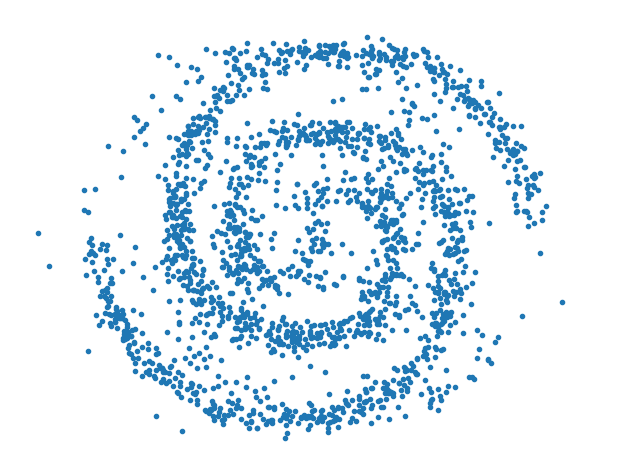

In [141]:

is_img = cfg.data.is_img
#n_samples = 9
if is_img:
    samples = samples.reshape(-1, 1, cfg.data.image_size, cfg.data.image_size)
    saving_train_path = os.path.join(cfg.saving.sample_plot_path, f"{cfg.model.name}{state['n_iter']}_{cfg.sampler.name}{cfg.sampler.num_steps}.png")
    fig = plt.figure(figsize=(9, 9)) 
    for i in range(n_samples):
        plt.subplot(int(np.sqrt(n_samples)), int(np.sqrt(n_samples)), 1 + i)
        plt.axis("off")
        plt.imshow(np.transpose(samples[i, ...], (1,2,0)), cmap="gray")
 
 
    plt.savefig(saving_train_path, transparent=True)
    plt.show()
    plt.close()
else:
    bm, inv_bm = synthetic.get_binmap(cfg.model.concat_dim, cfg.data.binmode)
    print(inv_bm)
    samples = synthetic.bin2float(samples.astype(np.int32), inv_bm, cfg.model.concat_dim, cfg.data.int_scale)

 
    saving_plot_path = os.path.join(path, f"{cfg.model.name}{state['n_iter']}_{cfg.sampler.name}{cfg.sampler.num_steps}.png")
    saving_np_path = os.path.join(path, f"samples_{cfg.model.name}{state['n_iter']}_{cfg.sampler.name}{cfg.sampler.num_steps}.npy")
    #np.save(f'{saving_np_path}', samples)

    #aving_plot_path = '/Users/paulheller/PythonRepositories/Master-Thesis/ContTimeDiscreteSpace/TAUnSDDM/SavedModels/MNIST/'
    synthetic.plot_samples(samples, 'synthetic_masked_elbo_taul.pdf', im_size=cfg.data.plot_size, im_fmt="pdf")


In [142]:
"""
n_samples = 2000
n_steps = 1000
for _, n_name in enumerate(['CRMLBJF', 'CRMTauL']):
    cfg.sampler.name = n_name 
    cfg.sampler.num_steps = n_steps
    sampler = sampling_utils.get_sampler(cfg)
    samples, changes= sampler.sample(model, n_samples)
    saved_samples = samples
    #np.save(f'hollow_direct_{cfg.sampler.name}{cfg.sampler.num_steps}_synthetic', saved_samples.reshape(n_samples, 1, cfg.data.image_size, cfg.data.image_size))
    np.save(f'masked_direct_{cfg.sampler.name}{cfg.sampler.num_steps}_synthetic', saved_samples) #.reshape(n_samples, 1, cfg.data.image_size, cfg.data.image_size))
"""

"\nn_samples = 2000\nn_steps = 1000\nfor _, n_name in enumerate(['CRMLBJF', 'CRMTauL']):\n    cfg.sampler.name = n_name \n    cfg.sampler.num_steps = n_steps\n    sampler = sampling_utils.get_sampler(cfg)\n    samples, changes= sampler.sample(model, n_samples)\n    saved_samples = samples\n    #np.save(f'hollow_direct_{cfg.sampler.name}{cfg.sampler.num_steps}_synthetic', saved_samples.reshape(n_samples, 1, cfg.data.image_size, cfg.data.image_size))\n    np.save(f'masked_direct_{cfg.sampler.name}{cfg.sampler.num_steps}_synthetic', saved_samples) #.reshape(n_samples, 1, cfg.data.image_size, cfg.data.image_size))\n"

In [143]:
"""
#steps = [10, 20, 30, 50, 100, 250, 500, 750, 1000, 2000]
n_samples = 35
steps = [1000]

for _, n_name in enumerate(['ExactSampling']):
    for _, n_steps in enumerate(steps):
        for i in range(200):
            cfg.sampler.name = n_name 
            cfg.sampler.num_steps = n_steps
            sampler = sampling_utils.get_sampler(cfg)
            samples, changes= sampler.sample(model, n_samples)
            saved_samples = samples
            np.save(f'hollow_{cfg.sampler.name}{cfg.sampler.num_steps}_mnist{i}', saved_samples.reshape(n_samples, 1, cfg.data.image_size, cfg.data.image_size))
#print(samples)
"""

"\n#steps = [10, 20, 30, 50, 100, 250, 500, 750, 1000, 2000]\nn_samples = 35\nsteps = [1000]\n\nfor _, n_name in enumerate(['ExactSampling']):\n    for _, n_steps in enumerate(steps):\n        for i in range(200):\n            cfg.sampler.name = n_name \n            cfg.sampler.num_steps = n_steps\n            sampler = sampling_utils.get_sampler(cfg)\n            samples, changes= sampler.sample(model, n_samples)\n            saved_samples = samples\n            np.save(f'hollow_{cfg.sampler.name}{cfg.sampler.num_steps}_mnist{i}', saved_samples.reshape(n_samples, 1, cfg.data.image_size, cfg.data.image_size))\n#print(samples)\n"

In [144]:
#steps = [10, 20, 30, 50, 100, 250, 500, 750, 1000]#, 2000]
# 1000 noch TauL, 2000 noch eins LBJF
# 5 a 200 noch hollow CRMLBJF und CRMTAUL
# 
"""
steps = [1000]
sampler_name = ['ExactSampling']
for sampler_n_i in sampler_name:
    for step in steps:
        data_list = []
        for i in range(111):
            print(f'hollow_{sampler_n_i}{step}_mnist{i}.npy')
            data_list.append(np.load(f'hollow_{sampler_n_i}{step}_mnist{i}.npy'))
        data = np.vstack(data_list)
        print(data.shape)
        np.save(f'Samples/mnist_hollow_{sampler_n_i}{step}.npy', data)
"""

"\nsteps = [1000]\nsampler_name = ['ExactSampling']\nfor sampler_n_i in sampler_name:\n    for step in steps:\n        data_list = []\n        for i in range(111):\n            print(f'hollow_{sampler_n_i}{step}_mnist{i}.npy')\n            data_list.append(np.load(f'hollow_{sampler_n_i}{step}_mnist{i}.npy'))\n        data = np.vstack(data_list)\n        print(data.shape)\n        np.save(f'Samples/mnist_hollow_{sampler_n_i}{step}.npy', data)\n"

In [145]:
"""
steps = [1000]# , 2000]
sampler_name = ['CRMTauL']

for sampler_n_i in sampler_name:
    for step in steps:
        data_list = []
        for i in range(20):
            print(f'hollow_{sampler_n_i}{step}_mnist{i+1}.npy')
            data_list.append(np.load(f'hollow_{sampler_n_i}{step}_mnist{i+1}.npy'))
        data = np.vstack(data_list)
        print(data.shape)
        np.save(f'Samples/mnist_hollow_{sampler_n_i}{step}_new.npy', data)
"""

"\nsteps = [1000]# , 2000]\nsampler_name = ['CRMTauL']\n\nfor sampler_n_i in sampler_name:\n    for step in steps:\n        data_list = []\n        for i in range(20):\n            print(f'hollow_{sampler_n_i}{step}_mnist{i+1}.npy')\n            data_list.append(np.load(f'hollow_{sampler_n_i}{step}_mnist{i+1}.npy'))\n        data = np.vstack(data_list)\n        print(data.shape)\n        np.save(f'Samples/mnist_hollow_{sampler_n_i}{step}_new.npy', data)\n"

In [146]:
"""
steps = [1000]
print("model Name", model_name)
n_samples = 200 # 1mal Taul 750 2500 samples und einmal LBJF 1000 25000 samples 
for i in range(40):
    for _, n_steps in enumerate(steps):
        for _, n_name in enumerate(['CRMLBJF', 'CRMTauL']):
            cfg.sampler.name = n_name 
            cfg.sampler.num_steps = n_steps
            sampler = sampling_utils.get_sampler(cfg)
            samples, changes= sampler.sample(model, n_samples)
            saved_samples = samples
            np.save(f'hollow_{cfg.sampler.name}{cfg.sampler.num_steps}_mnist{i+15}', saved_samples.reshape(n_samples, 1, cfg.data.image_size, cfg.data.image_size))
#print(samples)
"""


'\nsteps = [1000]\nprint("model Name", model_name)\nn_samples = 200 # 1mal Taul 750 2500 samples und einmal LBJF 1000 25000 samples \nfor i in range(40):\n    for _, n_steps in enumerate(steps):\n        for _, n_name in enumerate([\'CRMLBJF\', \'CRMTauL\']):\n            cfg.sampler.name = n_name \n            cfg.sampler.num_steps = n_steps\n            sampler = sampling_utils.get_sampler(cfg)\n            samples, changes= sampler.sample(model, n_samples)\n            saved_samples = samples\n            np.save(f\'hollow_{cfg.sampler.name}{cfg.sampler.num_steps}_mnist{i+15}\', saved_samples.reshape(n_samples, 1, cfg.data.image_size, cfg.data.image_size))\n#print(samples)\n'

In [147]:
"""
#np.save('PNGs/changing_dim_taul_maze50_ordinal.npy', changes)
#np.save('PNGs/changing_dim_lbjf_maze50.npy', changes)
changes_jump_taul = np.load('PNGs/changing_dim_taul_maze50_ordinal.npy')
changes_jump_lbjf = np.load('PNGs/changing_dim_lbjf_maze50.npy')
steps = np.linspace(1, 0, len(changes_jump_lbjf[:-1]))
plt.gca().invert_xaxis()
plt.plot(steps, changes_jump_lbjf[:-1], label='Euler')
plt.plot(steps, changes_jump_taul[:-1], label='Tau-Leaping', color='green')
plt.xlabel('Time', fontsize=13)
plt.ylabel('Avg. Proportion of Changing Dimensions', fontsize=13)
plt.legend()
plt.grid(True)
plt.savefig('PNGs/changing_dim_maze50_ordinal.png')
plt.show()
"""


"\n#np.save('PNGs/changing_dim_taul_maze50_ordinal.npy', changes)\n#np.save('PNGs/changing_dim_lbjf_maze50.npy', changes)\nchanges_jump_taul = np.load('PNGs/changing_dim_taul_maze50_ordinal.npy')\nchanges_jump_lbjf = np.load('PNGs/changing_dim_lbjf_maze50.npy')\nsteps = np.linspace(1, 0, len(changes_jump_lbjf[:-1]))\nplt.gca().invert_xaxis()\nplt.plot(steps, changes_jump_lbjf[:-1], label='Euler')\nplt.plot(steps, changes_jump_taul[:-1], label='Tau-Leaping', color='green')\nplt.xlabel('Time', fontsize=13)\nplt.ylabel('Avg. Proportion of Changing Dimensions', fontsize=13)\nplt.legend()\nplt.grid(True)\nplt.savefig('PNGs/changing_dim_maze50_ordinal.png')\nplt.show()\n"

In [148]:
#np.save('PNGs/state_changes_taul.npy', changes.detach().cpu().numpy())
"""
s_changes_taul = np.load('PNGs/state_changes_taul.npy')
changes[-1, 0, :].reshape(28,28)
shaped_changes = s_changes_taul[:, 0, :].reshape(-1, 28,28)
indices = np.where((shaped_changes[-1, :, :] > 20) & (shaped_changes[-1, :, :] < 250))
print(indices[0])
print(indices[1])
steps = np.linspace(1, 0, cfg.sampler.num_steps)
plt.gca().invert_xaxis()
#for i in range(max_number):
plt.plot(steps, shaped_changes[:, 14, 14])
plt.plot(steps, shaped_changes[:, 9, 8])
plt.plot(steps, shaped_changes[:, 10, 10])
plt.plot(steps, shaped_changes[:, 13, 7])
plt.plot(steps, shaped_changes[:, 24, 20])
plt.xlabel('Time', fontsize=13)
plt.ylabel('State',fontsize=13)
plt.legend()
plt.grid(True)
plt.savefig('PNGs/state_changes_taul.png')
plt.show()
"""

"\ns_changes_taul = np.load('PNGs/state_changes_taul.npy')\nchanges[-1, 0, :].reshape(28,28)\nshaped_changes = s_changes_taul[:, 0, :].reshape(-1, 28,28)\nindices = np.where((shaped_changes[-1, :, :] > 20) & (shaped_changes[-1, :, :] < 250))\nprint(indices[0])\nprint(indices[1])\nsteps = np.linspace(1, 0, cfg.sampler.num_steps)\nplt.gca().invert_xaxis()\n#for i in range(max_number):\nplt.plot(steps, shaped_changes[:, 14, 14])\nplt.plot(steps, shaped_changes[:, 9, 8])\nplt.plot(steps, shaped_changes[:, 10, 10])\nplt.plot(steps, shaped_changes[:, 13, 7])\nplt.plot(steps, shaped_changes[:, 24, 20])\nplt.xlabel('Time', fontsize=13)\nplt.ylabel('State',fontsize=13)\nplt.legend()\nplt.grid(True)\nplt.savefig('PNGs/state_changes_taul.png')\nplt.show()\n"

In [149]:
"""
#np.save('PNGs/state_changes_lbjf.npy', changes)
s_changes_lbjf = np.load('PNGs/state_changes_lbjf.npy')
changes[-1, 0, :].reshape(28,28)
shaped_changes = s_changes_lbjf[:, 0, :].reshape(-1, 28,28)
indices = np.where((shaped_changes[-1, :, :] > 20) & (shaped_changes[-1, :, :] < 250))
print(indices[0])
print(indices[1])
steps = np.linspace(1, 0, cfg.sampler.num_steps)
plt.gca().invert_xaxis()
#for i in range(max_number):
plt.plot(steps, shaped_changes[:, 10, 13])
plt.plot(steps, shaped_changes[:, 7, 18])
plt.plot(steps, shaped_changes[:, 9, 12])
plt.plot(steps, shaped_changes[:, 25, 10])
plt.plot(steps, shaped_changes[:, 17, 14])
plt.xlabel('Time', fontsize=13)
plt.ylabel('State',fontsize=13)
plt.legend()
plt.grid(True)
plt.savefig('PNGs/state_changes_lbjf.png')
plt.show()
"""

"\n#np.save('PNGs/state_changes_lbjf.npy', changes)\ns_changes_lbjf = np.load('PNGs/state_changes_lbjf.npy')\nchanges[-1, 0, :].reshape(28,28)\nshaped_changes = s_changes_lbjf[:, 0, :].reshape(-1, 28,28)\nindices = np.where((shaped_changes[-1, :, :] > 20) & (shaped_changes[-1, :, :] < 250))\nprint(indices[0])\nprint(indices[1])\nsteps = np.linspace(1, 0, cfg.sampler.num_steps)\nplt.gca().invert_xaxis()\n#for i in range(max_number):\nplt.plot(steps, shaped_changes[:, 10, 13])\nplt.plot(steps, shaped_changes[:, 7, 18])\nplt.plot(steps, shaped_changes[:, 9, 12])\nplt.plot(steps, shaped_changes[:, 25, 10])\nplt.plot(steps, shaped_changes[:, 17, 14])\nplt.xlabel('Time', fontsize=13)\nplt.ylabel('State',fontsize=13)\nplt.legend()\nplt.grid(True)\nplt.savefig('PNGs/state_changes_lbjf.png')\nplt.show()\n"

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


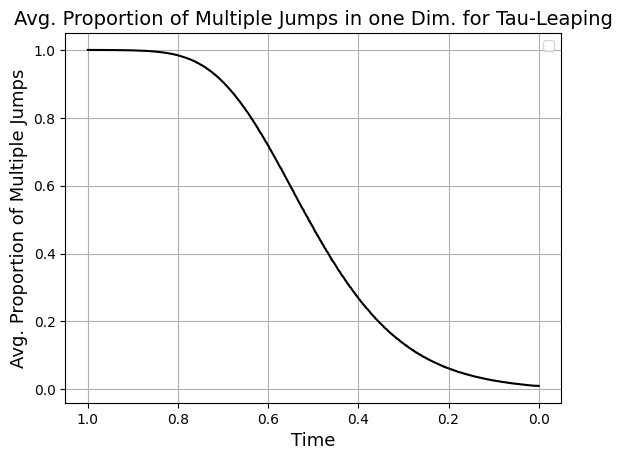

In [150]:
# multiple jumps in a single dim: MNIST

#np.save('PNGs/jumps_over_1_taul.npy', changes)
changes_jump_over1 = np.load('PNGs/MNIST/jumps_over_1_taul.npy')
steps = np.linspace(1, 0, len(changes_jump_over1[:-1]))

plt.gca().invert_xaxis()
plt.plot(steps, changes_jump_over1[:-1], color='black')
plt.xlabel('Time', fontsize=13)
plt.ylabel('Avg. Proportion of Multiple Jumps', fontsize=13)
plt.title('Avg. Proportion of Multiple Jumps in one Dim. for Tau-Leaping', fontsize=14)
plt.legend()
plt.grid(True)
plt.savefig('jumps_over_1_taul.pdf')
plt.show()


In [151]:
# clipped jumps: MNIST
"""
#np.save('PNGs/clipped_taul.npy', changes_clipped)
changes_clipped = np.load('PNGs/clipped_taul.npy')
steps = np.linspace(1, 0, len(changes_clipped[:-15]))
plt.gca().invert_xaxis()
plt.plot(steps, changes_clipped[:-15], color='black')
plt.xlabel('Time', fontsize=13)
plt.ylabel('Average Proportion of Clipped Jumps', fontsize=13)
plt.title('Average Proportion of Clipped Jumps for Tau-Leaping', fontsize=14)
plt.legend()
plt.grid(True)
plt.savefig("PNGs/clipped_taul.png")
plt.show()
"""

'\n#np.save(\'PNGs/clipped_taul.npy\', changes_clipped)\nchanges_clipped = np.load(\'PNGs/clipped_taul.npy\')\nsteps = np.linspace(1, 0, len(changes_clipped[:-15]))\nplt.gca().invert_xaxis()\nplt.plot(steps, changes_clipped[:-15], color=\'black\')\nplt.xlabel(\'Time\', fontsize=13)\nplt.ylabel(\'Average Proportion of Clipped Jumps\', fontsize=13)\nplt.title(\'Average Proportion of Clipped Jumps for Tau-Leaping\', fontsize=14)\nplt.legend()\nplt.grid(True)\nplt.savefig("PNGs/clipped_taul.png")\nplt.show()\n'

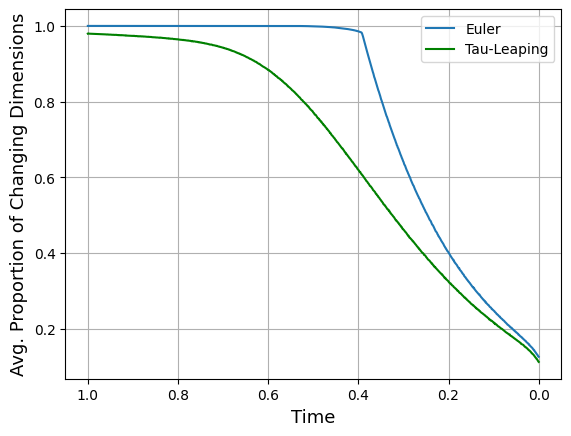

In [152]:
# changing dim mnist

#np.save('PNGs/changing_dim_lbjf.npy', changes)
#np.save('PNGs/changing_dim_taul.npy', changes_jump)
changes_jump_taul = np.load('PNGs/MNIST/changing_dim_taul.npy')
changes_jump_lbjf = np.load('PNGs/MNIST/changing_dim_lbjf.npy')
steps = np.linspace(1, 0, len(changes_jump_taul[:-1]))
plt.gca().invert_xaxis()
plt.plot(steps, changes_jump_lbjf[:-1], label='Euler')
plt.plot(steps, changes_jump_taul[:-1], label='Tau-Leaping', color='green')
plt.xlabel('Time', fontsize=13)
plt.ylabel('Avg. Proportion of Changing Dimensions', fontsize=13)
plt.legend()
plt.grid(True)
plt.savefig('changing_dim.pdf')
plt.show()


In [153]:
#np.save(f'lib/is_mnist/data/{cfg.model.name}_{cfg.sampler.name}{cfg.sampler.num_steps}.npy', saved_samples)

In [154]:
#np.save('lib/is_mnist/data/mnist_hollow_100exact1000.npy', saved_samples)

In [155]:
#np.save('SavedModels/MNIST/mnist_2704LBJF1000_200.npy', saved_samples[0:200])